In [19]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import csv
import matplotlib.pyplot as plt
import platform
import numpy as np
import requests
import time
import seaborn as sns


if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')


URL = 'https://playboard.co/'
URL2 = 'https://kr.noxinfluencer.com/youtube/channel-calculator/'
html = urlopen(URL)
SOUP = BeautifulSoup(html, 'html.parser')

category_list = ['vlog','travel','sports', 'vehicles', 'comedy', 'entertainment', 'film']
month_list = ['1609459200', '1612137600', '1614556800', '1617235200','1619827200', '1622505600',
              '1625097600','1627776000', '1630454400', '1633046400', '1635724800', '1638316800',
              '1640995200', '1643673600', '1646092800', '1648771200', '1651363200', '1654041600']
date_list = ['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06',
             '2021-07','2021-08','2021-09','2021-10','2021-11','2021-12',
             '2022-01','2022-02','2022-03','2022-04','2022-05', '2022-06']

for categorys in range(len(category_list)):
    url = '{}youtube-ranking/most-popular-{}-channels-in-south-korea-monthly?period='.format(URL,
                                                                                             category_list[categorys])
    name_list = []
    viewed_list = []
    rank_info = {}

    for mon in range(len(month_list)):
        urls = url + month_list[mon]
        html = urlopen(urls)
        soup = BeautifulSoup(html, 'html.parser')
        best_rank = soup.select_one('tbody>tr')
        name = best_rank.find('td', class_='name').find('a', class_='name__label').text
        viewed = best_rank.find('td', class_='score').text

        name_list.append(name)
        viewed_list.append(viewed)

        # rank_info = {'채널이름':name_list, '조회수':viewed_list}

df = pd.DataFrame({'채널이름': name_list, '조회수': viewed_list}, index=date_list)
df.to_csv(f'{category_list[categorys]}_view_top.csv', encoding='utf-8', index=True)

In [20]:
# ---------------------------------------------------------------------------------------------------------------------
import os
DIR = './datas/exam/'
os.listdir(DIR)

for file in range(len(os.listdir(DIR))):
    globals()['df{}'.format(file+1)] = pd.read_csv( DIR + os.listdir(DIR)[file], index_col=0 )

for i in range(7):
    globals()['df{}'.format(i+1)]['조회수'] = globals()['df{}'.format(i+1)]['조회수'].str.replace(',', '')
    globals()['df{}'.format(i+1)]['조회수'] = globals()['df{}'.format(i+1)]['조회수'].astype('int64')

In [21]:
# DF들을 concat으로 붙이는 작업, 각 DF의 인덱스는 무시하는 파라미터 숙지!!
DF = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
DF

,채널이름,조회수
0,사나이 김기훈,19961738
1,사나이 김기훈,18409186
2,피식대학Psick Univ,17363296
3,진우와 해티,21055047
4,CJY中,179845708
...,...,...
121,진성호방송,147660362
122,진성호방송,205599478
123,Jᴇᴏɴɪᴄs♥︎방탄°,98655183
124,Jᴇᴏɴɪᴄs♥︎방탄°,118406472


In [22]:
len(df['조회수'])

18

# < 범례의 활용 & 다중 꺾은선 그래프 >

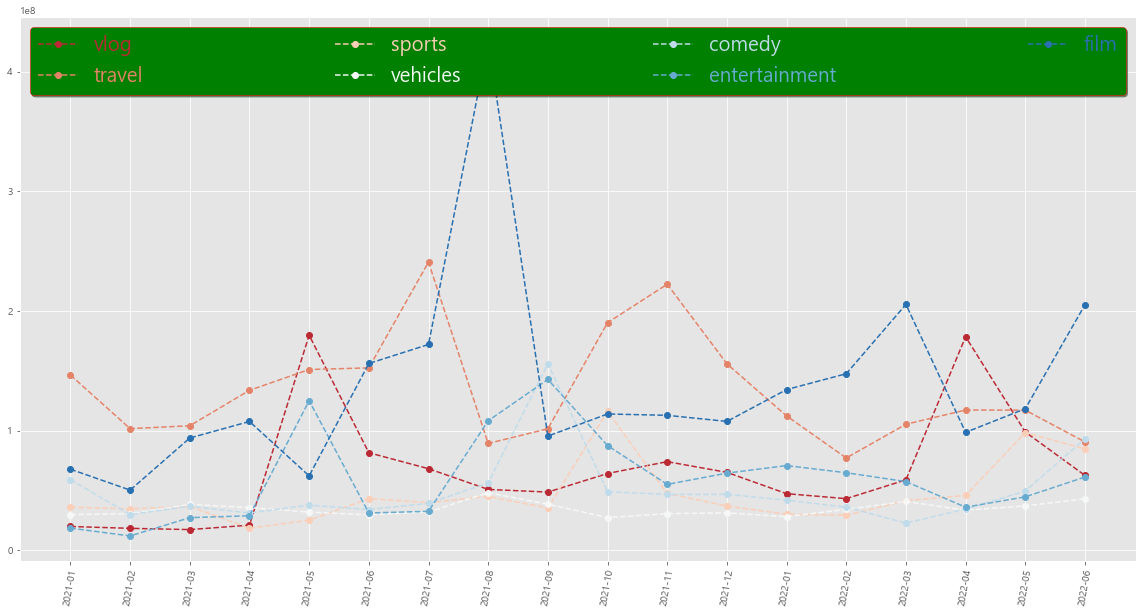

In [23]:
# 리스트 개수만큼 파레트에서 색깔 갖고 옴
colors = sns.color_palette('RdBu', len(category_list))

# 리스트에 DF들을 담아 두고
dfs = [df1,df2,df3,df4,df5,df6,df7]

# 피규어를 만들어 
plt.figure(figsize=(20,10))

# plt.xticks(눈금을 적용할 x축의 실제 위치, 해당 위치에 나타낼 값)
plt.xticks(range(len(date_list)), date_list, rotation=80)


# 꺾은선 그래프를 피규어 안에 그리는 것을 반복하는것

for topic in category_list:                                     
#  해당 for문에서 불러낼 DF (해당 category_list의 요소에 해당하는 인덱스번호를 불러내는 것 => 해당 DF 부름)
    df = dfs[category_list.index(topic)]
# len을 써보니 18개였으니, 눈금을 적용할 x축의 실제 위치를 range(18)로 하고, 해당 위치에 나타낼 값으로 불러낸 DF의 '조회수' 컬럼의 값을 지정
    plt.plot(range(18), df['조회수'],
             'o--', color=colors[category_list.index(topic)])    
# 수치만 다른 동일한 형태의 그래프를 그려도 같은 인덱스를 지정하는 것이니 색깔을 동일하게 표현할 수 있을 것임
# plt.legend(category_list,loc = 2, fontsize=20)

# 범례 관련 파라미터
# 내용, 위치, 글자크기, 열의 개수, 범례 텍스트 상자의 테두리 표시 여부,
# 범례 텍스트 상자의 그림자 표시 여부, 범례배경색, 범례 텍스트 상자 테두리 색, 확장모드
leg = plt.legend(category_list,loc = 2, fontsize=20, ncol=4, frameon=True, shadow=True, facecolor='green', edgecolor='red', mode='expand')
# 그래프의 색깔과 범례 텍스트의 색깔을 똑같이 해주는 것
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[i])

# 범례의 열 개수 지정하기
# plt.legend(loc='best')          # ncol = 1
# plt.legend(loc='best', ncol=2)    # ncol = 2

plt.show()